# **Introduction**

**L'√©tude du Produit Int√©rieur Brut (PIB) est fondamentale pour comprendre la dynamique √©conomique d'un pays sur une p√©riode donn√©e. Selon Fran√ßois Perroux, √©conomiste fran√ßais de renom, le PIB repr√©sente ¬´ la somme des valeurs ajout√©es marchandes et non marchandes cr√©√©es au cours d'une ann√©e sur le territoire national ¬ª. Cette d√©finition met en lumi√®re l'importance du PIB comme mesure synth√©tique refl√©tant l'activit√© √©conomique globale.**

**Cependant, les courants de pens√©e √©conomique divergent quant √† la pertinence et aux limites du PIB. D'une part, l'√©cole classique et n√©oclassique consid√®re le PIB comme un indicateur central et indispensable pour √©valuer la croissance √©conomique, la sant√© d'une √©conomie et orienter les politiques publiques. D'autre part, les courants critiques et post-croissance d√©noncent les insuffisances de cet indicateur, qui ne prend pas en compte le bien-√™tre, les in√©galit√©s, ni les impacts environnementaux de la croissance √©conomique.**

**Le probl√®me pos√© par cette √©tude est donc double : comment interpr√©ter l'√©volution du PIB √† la lumi√®re de ces d√©bats √©conomiques ? Quels enseignements peut-on tirer d'une analyse approfondie tant quantitative que qualitative de ces donn√©es pour mieux comprendre les transformations √©conomiques ?**

**Pour r√©pondre √† ces questions, l'√©tude se concentrera sur l'analyse statistique descriptive du PIB am√©ricain, l'examen des s√©ries temporelles. En particulier, la m√©thode Hot Winter sera mobilis√©e afin d'explorer les relations dynamiques entre variables √©conomiques au fil du temps. Cette approche m√©thodologique permettra de saisir les tendances, ruptures et influences structurelles du PIB am√©ricain sur une p√©riode de 50 ans, int√©grant ainsi une perspective critique sur la croissance √©conomique.**

## **I-Importation,nettoyage et exploration des donn√©es**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings

from scipy.stats import norm, shapiro, kurtosis, skew
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import missingno as msno

### **- Importation des donn√©es**

In [38]:
pib = pd.read_csv("gdp_data.csv")
pib = pib.rename(columns = {'GDP':'PIB'})
pib

DATE        PIB
0    1974-01-01   1491.209
1    1974-04-01   1530.056
2    1974-07-01   1560.026
3    1974-10-01   1599.679
4    1975-01-01   1616.116
..          ...        ...
196  2023-01-01  26813.601
197  2023-04-01  27063.012
198  2023-07-01  27610.128
199  2023-10-01  27956.998
200  2024-01-01  28269.174

[201 rows x 2 columns]

Nous sommes en pr√©sence de donn√©es √©conomiques notamment celui du PIB am√©ricain de 1974-2024. il comprend 201 p√©riodes d√©compos√© en trimestre par Ann√©e et deux colonnes dont une colonne date allant de 1974 √† 2024 et une colonne PIB.

### **- Nettoyage**

**Doublons**

In [39]:
duplicated_rows = pib['DATE'].duplicated()
nombre_doublons = duplicated_rows.sum()

print("Nombre de doublons :", nombre_doublons)

Nombre de doublons : 0


**Valeurs manquantes**

In [40]:
nombre_valeurs_manquantes = pib.isna().sum().sum()
print("Nombre de valeurs manquantes :", nombre_valeurs_manquantes)

Nombre de valeurs manquantes : 0


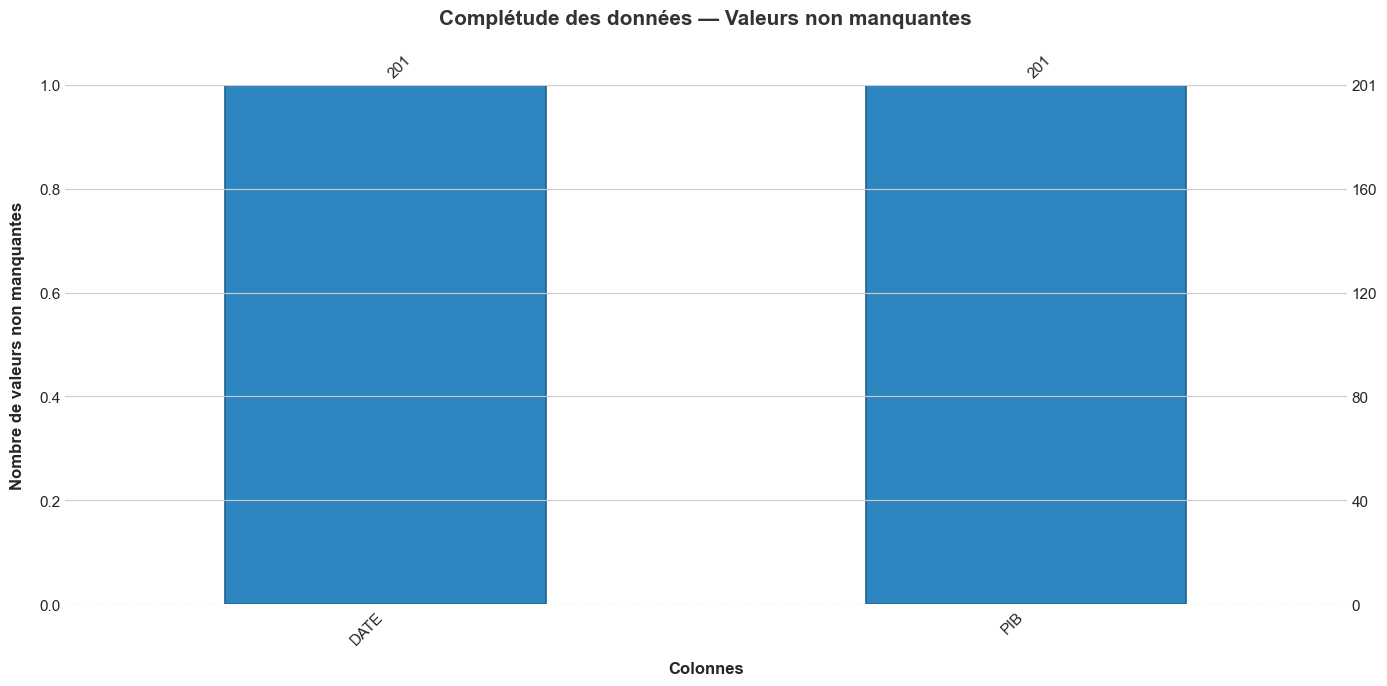

In [41]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

ax = msno.bar(
    pib,
    figsize=(14, 7),
    color='#2E86C1',       
    fontsize=11,
    labels=True,           
    log=False              
)

ax.set_title("Compl√©tude des donn√©es ‚Äî Valeurs non manquantes",
             fontsize=15, fontweight='bold', pad=20, color='#333333')
ax.set_xlabel("Colonnes", fontsize=12, fontweight='bold', labelpad=10)
ax.set_ylabel("Nombre de valeurs non manquantes", fontsize=12, fontweight='bold', labelpad=10)

for patch in ax.patches:
    patch.set_edgecolor('#1F618D')   
    patch.set_linewidth(1.2)

ax.grid(axis='y', linestyle='--', alpha=0.6, color='#aaaaaa')
ax.set_axisbelow(True) 

plt.tight_layout()
plt.show()

# **II- Analyse descriptives de la serie temporelle**

### **1) Construction de la serie temporelle**

In [42]:
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")

pib['Date_tri'] = pd.date_range(start = "1974-01", periods = len(pib), freq = 'Q')
pib['DATE'] = pib['Date_tri'].dt.year
pib.set_index("Date_tri", inplace = True)

In [43]:
pib.head()

DATE       PIB
Date_tri                  
1974-03-31  1974  1491.209
1974-06-30  1974  1530.056
1974-09-30  1974  1560.026
1974-12-31  1974  1599.679
1975-03-31  1975  1616.116

### **- Structure de l‚Äôobjet**

In [44]:
pib.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201 entries, 1974-03-31 to 2024-03-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    201 non-null    int32  
 1   PIB     201 non-null    float64
dtypes: float64(1), int32(1)
memory usage: 3.9 KB


**- Le type de chaque colonne : num√©rique**

**- Le nombre de valeurs non nulles : 201 non-null**

**- La m√©moire utilis√©e : 12.0 KB**

**- L‚Äôindex et sa fr√©quence : 201 entries, 1974-03-31 to 2024-03-31**

### **- M√©tadonn√©es de l‚Äôobjet**

In [45]:
pib.attrs 
print("Index :", pib.index)
print("Colonnes :", pib.columns)
print("Types :", pib.dtypes)

Index : DatetimeIndex(['1974-03-31', '1974-06-30', '1974-09-30', '1974-12-31',
               '1975-03-31', '1975-06-30', '1975-09-30', '1975-12-31',
               '1976-03-31', '1976-06-30',
               ...
               '2021-12-31', '2022-03-31', '2022-06-30', '2022-09-30',
               '2022-12-31', '2023-03-31', '2023-06-30', '2023-09-30',
               '2023-12-31', '2024-03-31'],
              dtype='datetime64[ns]', name='Date_tri', length=201, freq=None)
Colonnes : Index(['DATE', 'PIB'], dtype='object')
Types : DATE      int32
PIB     float64
dtype: object


### **-Statistiques descriptives**

In [46]:
a = pib.drop("DATE", axis = 1)
a.describe().transpose()

count          mean          std       min       25%       50%       75%  \
PIB  201.0  10767.185687  7074.040546  1491.209  4607.669  9411.682  15647.68   

           max  
PIB  28269.174

Entre 1974 et 2025, le PIB des √âtats-Unis est pass√© de 1 491 √† plus de 28 000 milliards de dollars. Malgr√© les crises majeures comme le choc p√©trolier des ann√©es 70, la crise financi√®re de 2008 ou la pand√©mie de COVID-19, l‚Äô√©conomie am√©ricaine a su rebondir √† chaque fois. Dans les ann√©es 80 et 90, la d√©r√©glementation et l‚Äôessor technologique ont donn√© naissance √† la Silicon Valley, transformant profond√©ment le tissu √©conomique. Plus r√©cemment, les plans de relance post-COVID et les investissements dans les infrastructures et la transition √©nerg√©tique ont permis aux √âtats-Unis de maintenir leur dynamique, tout en se repositionnant comme leader dans les technologies vertes. Cette trajectoire montre une chose : les √âtats-Unis ont su transformer les d√©fis en leviers de croissance. PIB d'o√π cette croissance.

### **2) Graphiques**

### **Serie temporelle**

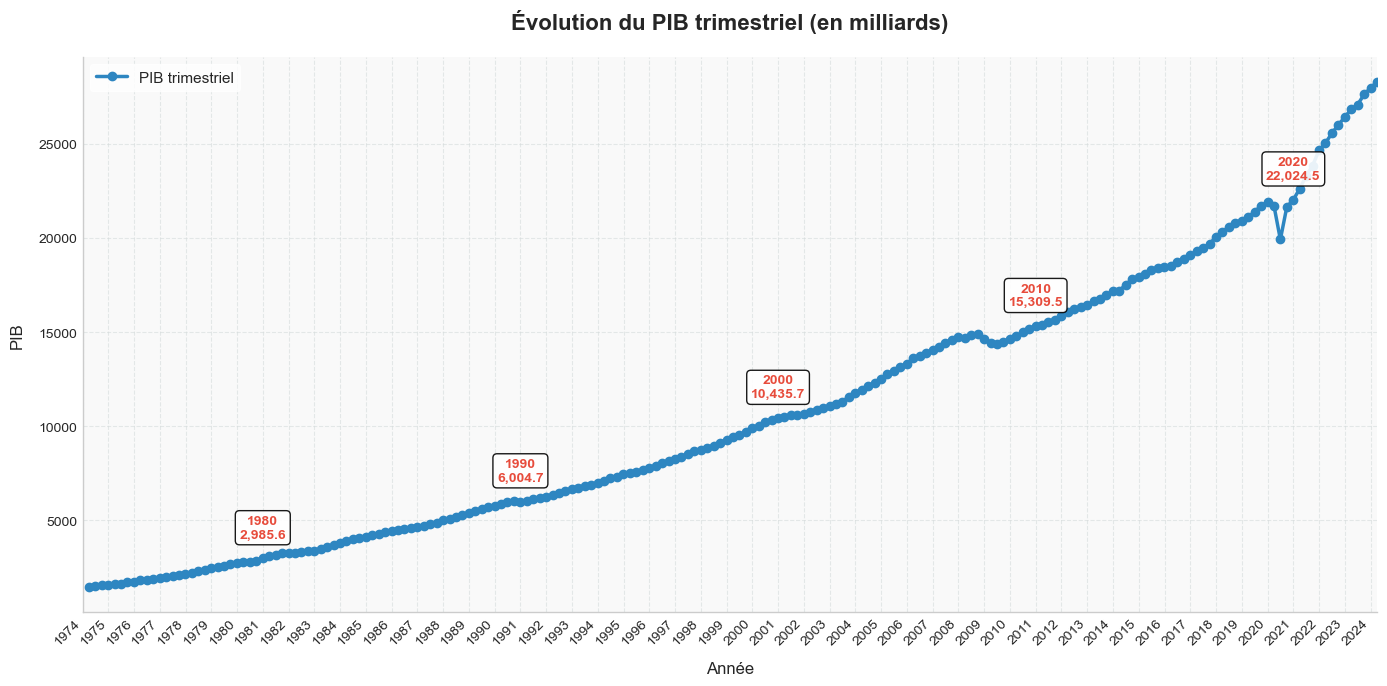

In [47]:
plt.figure(figsize=(14, 7))

plt.plot(pib.index, pib['PIB'],
         color='#2E86C1', linewidth=2.5, label='PIB trimestriel', marker='o', markersize=6)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()

plt.title("√âvolution du PIB trimestriel (en milliards)", fontsize=16, pad=20, fontweight='bold')
plt.xlabel("Ann√©e", fontsize=12, labelpad=10)
plt.ylabel("PIB", fontsize=12, labelpad=10)

plt.grid(True, linestyle='--', alpha=0.6, color='#D5DBDB')
plt.gca().set_facecolor('#F9F9F9')

plt.legend(loc='upper left', frameon=True, facecolor='white', edgecolor='white')

plt.tick_params(axis='both', which='major', labelsize=10)

start_year = pib.index.min().year
end_year = pib.index.max().year
plt.gca().set_xlim([pib.index.min(), pib.index.max()])
plt.xticks([f"{year}-01-01" for year in range(start_year, end_year + 1)],
           [str(year) for year in range(start_year, end_year + 1)],
           rotation=45, ha='right')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for year in range(start_year, end_year + 1):
    if year % 10 == 0: 
        year_data = pib[pib.index.year == year]
        if not year_data.empty:
            last_value = year_data['PIB'].iloc[-1]
            last_date = year_data.index[-1]
            plt.annotate(f'{year}\n{last_value:,.1f}',
                         xy=(last_date, last_value),
                         xytext=(0, 15), textcoords='offset points',
                         ha='center', fontsize=10, color='#E74C3C', 
                         bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.9),
                         fontweight='bold')

plt.tight_layout()
plt.show()

### **Histogramme**

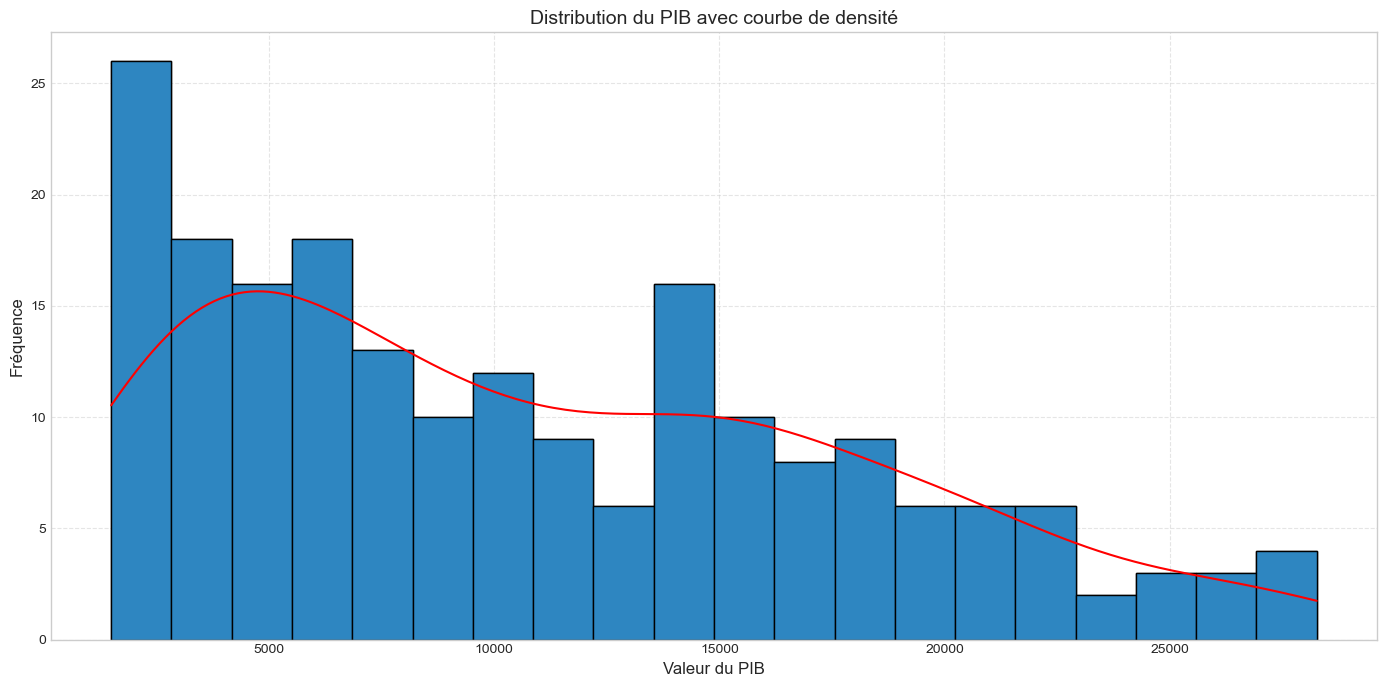

In [48]:
plt.figure(figsize=(14, 7))

sns.histplot(pib['PIB'].dropna(), bins=20, kde=True, color='red', edgecolor='black')

plt.title("Distribution du PIB avec courbe de densit√©", fontsize=14)
plt.hist(pib['PIB'], bins=20, color='#2E86C1', edgecolor='black')
plt.xlabel("Valeur du PIB", fontsize=12)
plt.ylabel("Fr√©quence", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### **Boxplot**

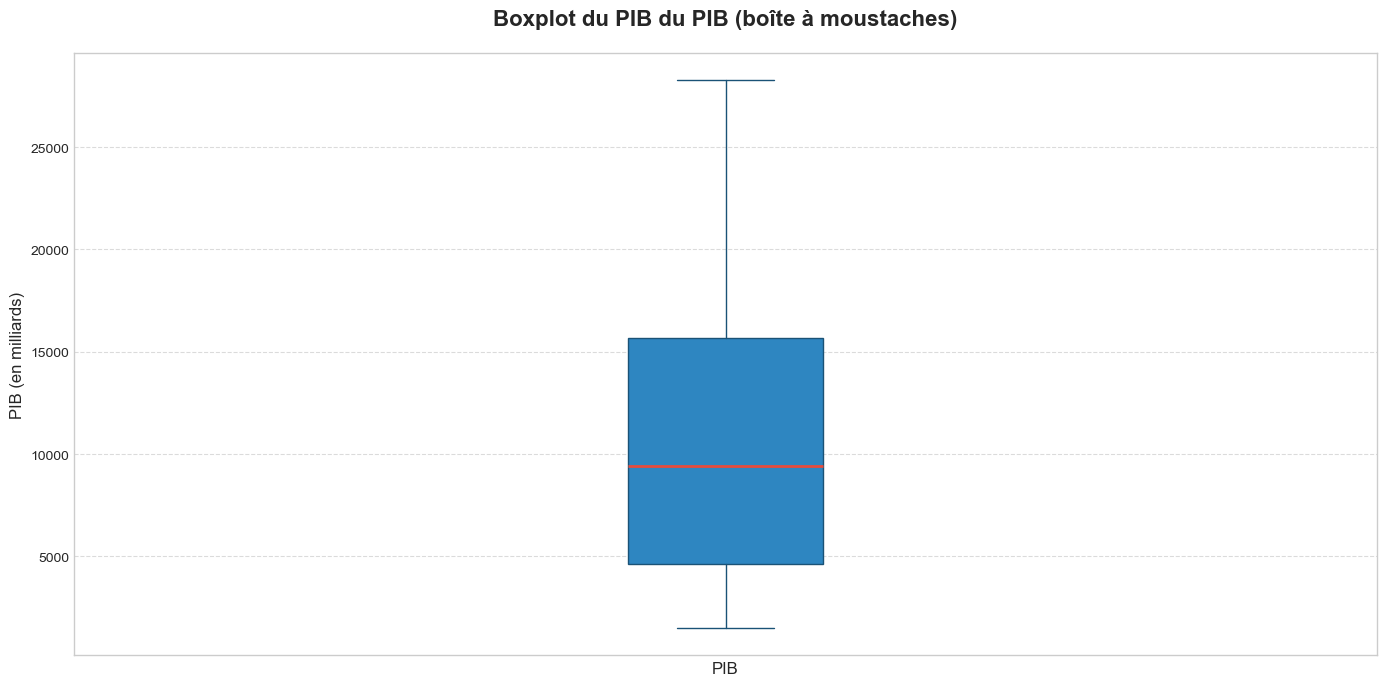

In [49]:
plt.figure(figsize=(14, 7))
plt.boxplot(a, 
            vert=True,
            patch_artist=True,
            boxprops=dict(facecolor='#2E86C1', color='#1A5276'),
            whiskerprops=dict(color='#1A5276'),
            capprops=dict(color='#1A5276'),
            medianprops=dict(color='#E74C3C', linewidth=2),
            flierprops=dict(marker='o', markerfacecolor='#E74C3C', markersize=6, alpha=0.5))

plt.title("Boxplot du PIB du PIB (bo√Æte √† moustaches)", fontsize=16, pad=20, fontweight='bold')
plt.xlabel("PIB", fontsize=12)
plt.ylabel("PIB (en milliards)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks([])

plt.tight_layout()
plt.show()

### **3) INDICES STATISTIQUES**

#### **a) Indices de tendance centrale**

In [50]:
a.mean()

PIB    10767.185687
dtype: float64

#### **b) Indices de dispersion**

In [51]:
a.var()

PIB    5.004205e+07
dtype: float64

In [52]:
a.std()

PIB    7074.040546
dtype: float64

#### **c) Indices de formes**

In [53]:
serie_pib = a['PIB']
kurtosis_pib = kurtosis(serie_pib, bias=False) 
skewness_pib = skew(serie_pib, bias=False)  

print(f"Kurtosis (Aplatissement) : {kurtosis_pib:.4f}")
print(f"Skewness (Asym√©trie) : {skewness_pib:.4f}")

Kurtosis (Aplatissement) : -0.6448
Skewness (Asym√©trie) : 0.5761


#### **d) Indices de d√©pendance**

##### **- Autocorr√©lation** 

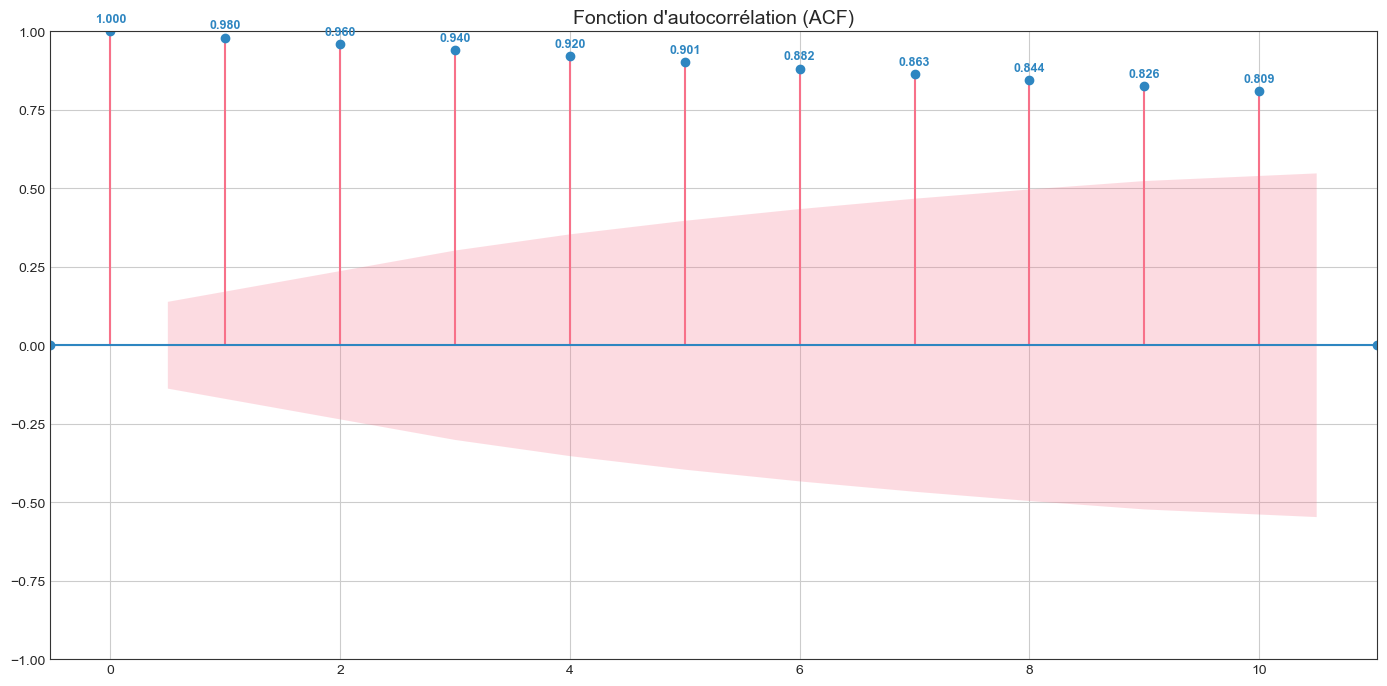

In [54]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.linewidth'] = 0.8

fig, ax = plt.subplots(figsize=(14, 7))

plot_acf(
    a.dropna(),
    lags=10,
    alpha=0.05,
    ax=ax,
    color='#2E86C1',  
    marker='o',       
    markersize=6,     
    linewidth=1.5,    
    title="Fonction d'autocorr√©lation (ACF)",
    missing='drop'
)

from statsmodels.tsa.stattools import acf
acf_values = acf(a.dropna(), nlags=10, fft=False)  

for i, v in enumerate(acf_values):
    ax.text(i, v + 0.02, f"{v:.3f}", ha='center', va='bottom', fontsize=9, color='#2E86C1', fontweight='bold')

plt.tight_layout()
plt.show()


##### **- Autocorr√©lation Partielle**

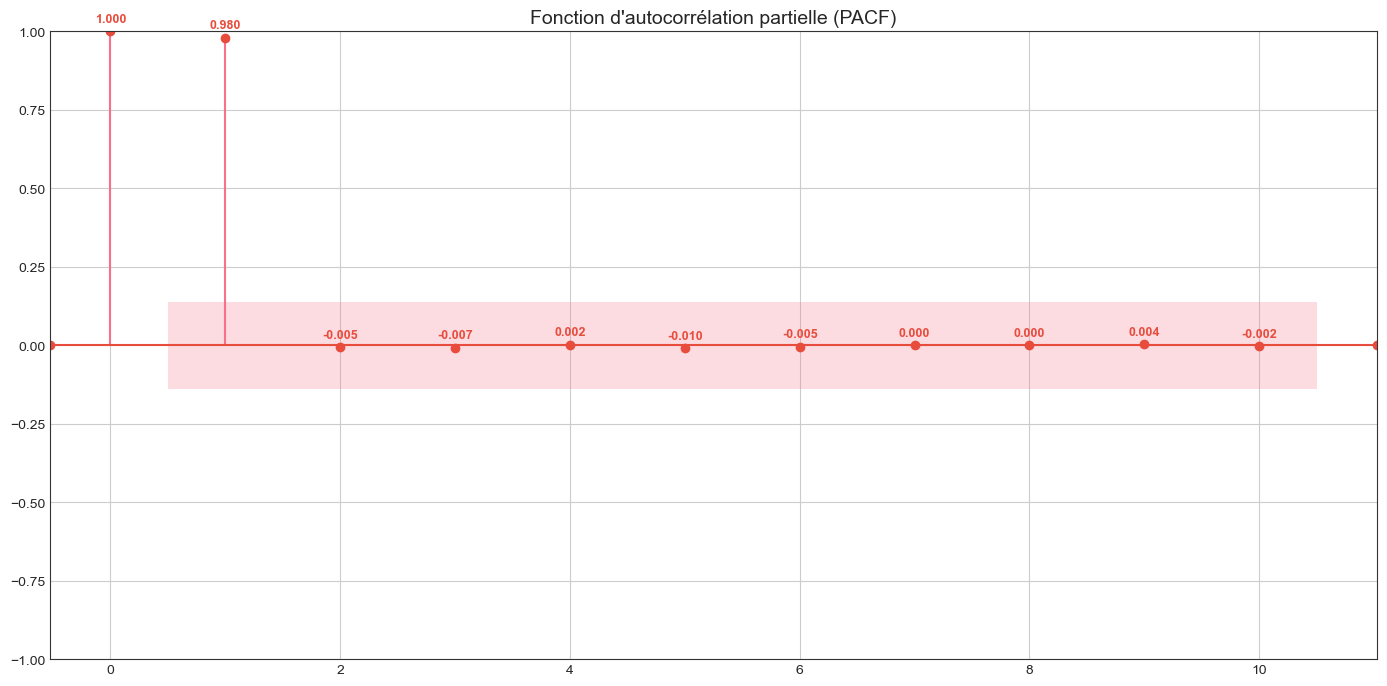

In [55]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.linewidth'] = 0.8


fig, ax = plt.subplots(figsize=(14, 7))

plot_pacf(
    a.dropna(),
    lags=10,
    alpha=0.05,
    ax=ax,
    method='ywm',      
    color='#E74C3C',   
    marker='o',
    markersize=6,
    linewidth=1.5,
    title="Fonction d'autocorr√©lation partielle (PACF)"
)

pacf_values = pacf(a.dropna(), nlags=10, method='ywm') 

for i, v in enumerate(pacf_values):
    ax.text(i, v + 0.02, f"{v:.3f}", 
            ha='center', va='bottom', 
            fontsize=9, color='#E74C3C', fontweight='bold')

plt.tight_layout()
plt.show()

# **III- Lissage exponentielle et Hotwinter**

En r√®gle g√©n√©rale, sous Python on laisse l‚Äôalgorithme lui-m√™me calculer les valeurs optimales de : alpha, beta et gamma

In [56]:
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")

model = ExponentialSmoothing(
    a,
    trend='add',
    seasonal=None,
    initialization_method='estimated'
)

fitted_model = model.fit()

print("üìä R√©sum√© du mod√®le Holt-Winters (lissage exponentiel)")
print("="*60)
print(f"Alpha (niveau)     : {fitted_model.params['smoothing_level']:.5f}")
print(f"Beta (tendance)    : {fitted_model.params['smoothing_trend']:.5f}")
print(f"SSE (erreur)       : {fitted_model.sse:,.2f}")
print(f"Nombre d'obs.      : {len(a)}")
if isinstance(a.index, pd.DatetimeIndex):
    print(f"Date d√©but/fin     : {a.index[0]} ‚Üí {a.index[-1]}")


üìä R√©sum√© du mod√®le Holt-Winters (lissage exponentiel)
Alpha (niveau)     : 0.87714
Beta (tendance)    : 0.08771
SSE (erreur)       : 8,675,867.69
Nombre d'obs.      : 201
Date d√©but/fin     : 1974-03-31 00:00:00 ‚Üí 2024-03-31 00:00:00


#### **-Valeurs liss√©es**

In [57]:
valeurs_lissees = fitted_model.fittedvalues
valeurs_lissees

Date_tri
1974-03-31     1477.750655
1974-06-30     1530.944392
1974-09-30     1571.485640
1974-12-31     1601.872712
1975-03-31     1640.218547
                  ...     
2023-03-31    26758.881677
2023-06-30    27170.895939
2023-09-30    27431.983541
2023-12-31    27957.664980
2024-03-31    28326.451927
Length: 201, dtype: float64

#### **- Visualisation du Lissage exponentiel** 

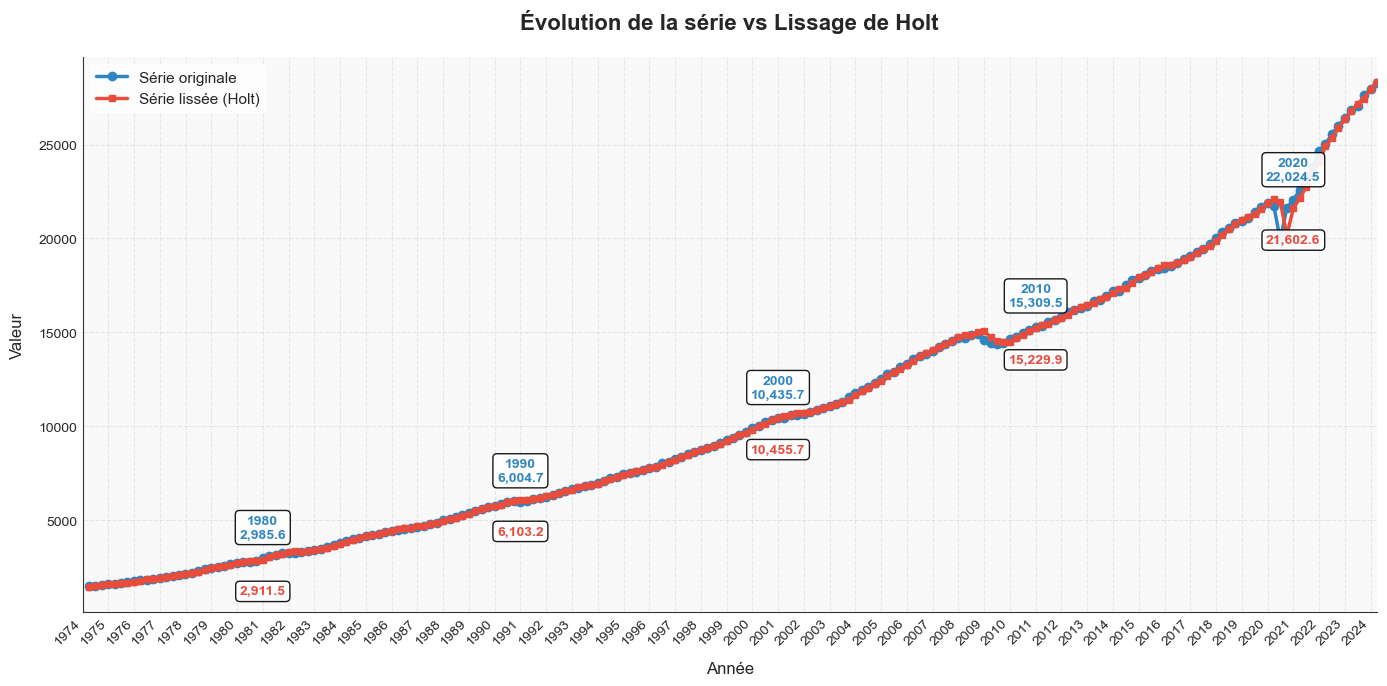

In [58]:
warnings.filterwarnings("ignore", category=UserWarning)     
warnings.filterwarnings("ignore", category=FutureWarning)   
plt.rcParams.update({'figure.max_open_warning': 0})          

plt.figure(figsize=(14, 7))

plt.plot(a.index, a,
         color='#2E86C1', linewidth=2.5, label='S√©rie originale', marker='o', markersize=6)

plt.plot(a.index, fitted_model.fittedvalues,
         color='#E74C3C', linewidth=2.5, label='S√©rie liss√©e (Holt)', marker='s', markersize=5)

if isinstance(a.index, pd.DatetimeIndex):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gcf().autofmt_xdate()

plt.title("√âvolution de la s√©rie vs Lissage de Holt", fontsize=16, pad=20, fontweight='bold')
plt.xlabel("Ann√©e", fontsize=12, labelpad=10)
plt.ylabel("Valeur", fontsize=12, labelpad=10)

plt.grid(True, linestyle='--', alpha=0.6, color='#D5DBDB')
plt.gca().set_facecolor('#F9F9F9')

plt.legend(loc='upper left', frameon=True, facecolor='white', edgecolor='white', fontsize=11)

plt.tick_params(axis='both', which='major', labelsize=10)

if isinstance(a.index, pd.DatetimeIndex):
    start_year = a.index.min().year
    end_year = a.index.max().year
    plt.gca().set_xlim([a.index.min(), a.index.max()])


    tick_dates = []
    tick_labels = []
    for year in range(start_year, end_year + 1):
        try:
            tick_date = pd.Timestamp(f"{year}-01-01")
            tick_dates.append(tick_date)
            tick_labels.append(str(year))
        except:
            continue 

    if tick_dates:
        plt.xticks(tick_dates, tick_labels, rotation=45, ha='right')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

if isinstance(a.index, pd.DatetimeIndex):
    start_year = a.index.min().year
    end_year = a.index.max().year

    for year in range(start_year, end_year + 1):
        if year % 10 == 0:
           
            year_mask = a.index.year == year

            if year_mask.sum() > 0:
                try:
                    last_orig_value = float(a[year_mask].iloc[-1])
                    last_orig_date = a[year_mask].index[-1]

                    plt.annotate(f'{year}\n{last_orig_value:,.1f}',
                                 xy=(last_orig_date, last_orig_value),
                                 xytext=(0, 15), textcoords='offset points',
                                 ha='center', fontsize=10, color='#2E86C1',
                                 bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.9),
                                 fontweight='bold')

                    smooth_slice = fitted_model.fittedvalues[year_mask]
                    if len(smooth_slice) > 0:
                        last_smooth_value = float(smooth_slice.iloc[-1])
                        last_smooth_date = smooth_slice.index[-1]

                        plt.annotate(f'{last_smooth_value:,.1f}',
                                     xy=(last_smooth_date, last_smooth_value),
                                     xytext=(0, -25), textcoords='offset points',
                                     ha='center', fontsize=10, color='#E74C3C',
                                     bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.9),
                                     fontweight='bold')

                except Exception:
                    continue

plt.tight_layout()
plt.show()

# **IV- Validation du mod√®le de lissage par l‚Äôanalyse des r√©sidus** 

Il s‚Äôagit de v√©rifier si les r√©sidus du mod√®le choisi suivent un processus bruit blanc (nous verrons cela en d√©tail 
dans le mod√®le ARIMA). Dans le cas contraire, le mod√®le n‚Äôest pas bon. Il va falloir choisir un autre ou 
reprendre les √©tapes pr√©c√©dentes. La satisfaction de la seule condition de bruit blanc suffit pour valider le 
mod√®le. Mais si les r√©sidus suivent en plus un processus gaussien (loi normal), le mod√®le serait encore plus 
int√©ressant

### **- R√©cup√©rer les r√©sidus**

In [59]:
residus = fitted_model.resid

print("üìâ R√©sidus du mod√®le de lissage exponentiel :")
print(residus)

üìâ R√©sidus du mod√®le de lissage exponentiel :
Date_tri
1974-03-31     13.458345
1974-06-30     -0.888392
1974-09-30    -11.459640
1974-12-31     -2.193712
1975-03-31    -24.102547
                 ...    
2023-03-31     54.719323
2023-06-30   -107.883939
2023-09-30    178.144459
2023-12-31     -0.666980
2024-03-31    -57.277927
Length: 201, dtype: float64


### **Graphe**

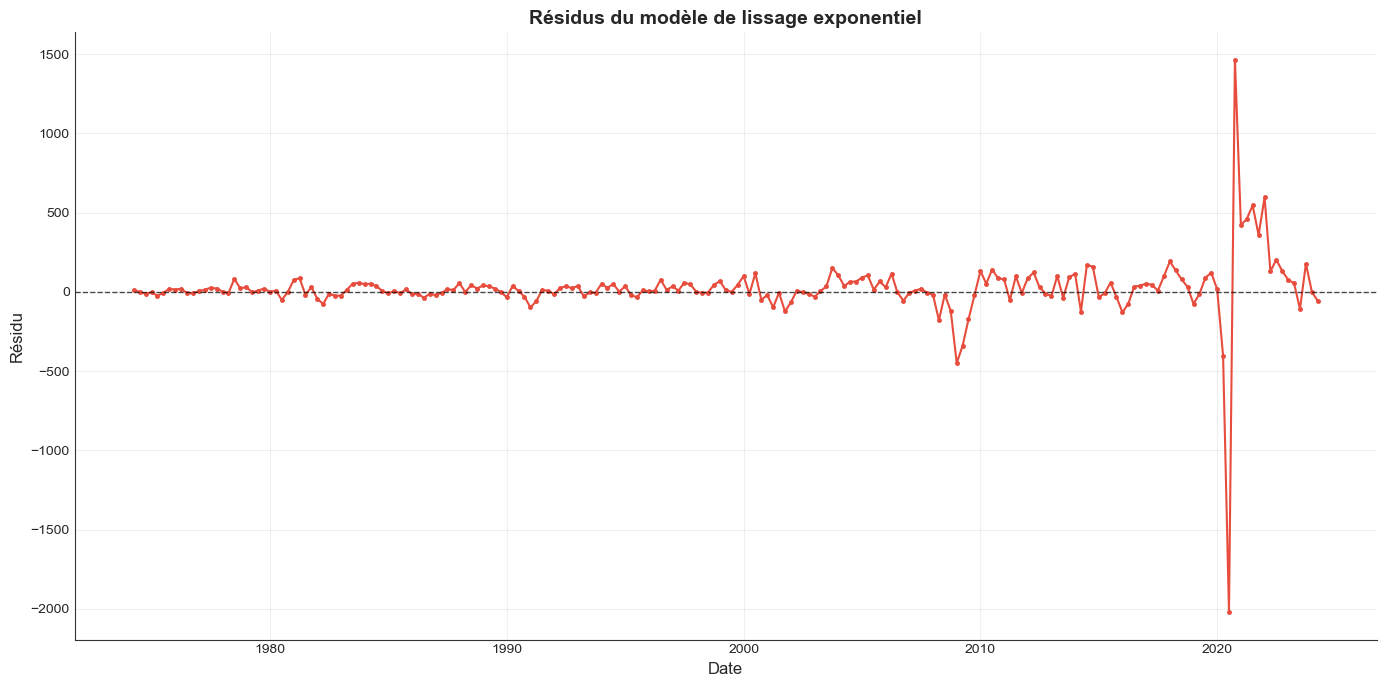

In [60]:
plt.figure(figsize=(14, 7))
plt.plot(residus.index, residus, color='#E74C3C', marker='.', linestyle='-', linewidth=1.5, markersize=5)
plt.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.7)
plt.title("R√©sidus du mod√®le de lissage exponentiel", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("R√©sidu")
plt.grid(True, alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

### **- BRUIT BLANC (Test de Ljung-Box)** 

<Figure size 1400x700 with 0 Axes>

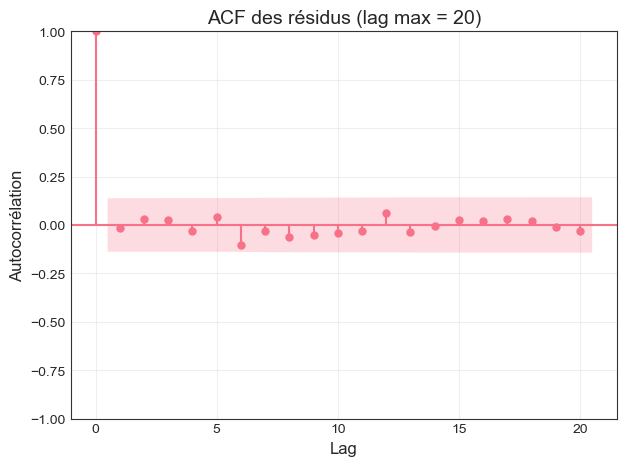

In [61]:
residus_clean = residus.dropna()

plt.figure(figsize=(14, 7))

plot_acf(residus_clean, lags=20, alpha=0.05, title="ACF des r√©sidus (lag max = 20)")
plt.xlabel("Lag")
plt.ylabel("Autocorr√©lation")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show();

**H0 : La s√©rie est un bruit blanc(autocorr√©lations nulles jusqu‚Äôau lag 20)**

**H1: La s√©rie n‚Äôest pas un bruit blanc (au moins une autocorr√©lation significative)**

In [62]:
residus_clean = residus.dropna()

lb_test = acorr_ljungbox(residus_clean, lags=[20], return_df=True)

print("üìä Test de Ljung-Box (H‚ÇÄ : bruit blanc) ‚Äî Lag 20")
print("="*55)
print(lb_test)

üìä Test de Ljung-Box (H‚ÇÄ : bruit blanc) ‚Äî Lag 20
     lb_stat  lb_pvalue
20  7.320439   0.995494


Conclusion : la p-value > 0.05, on ne peut rejetter H0, la s√©rie est un bruit blanc. Ici, 
la statistique de test de Ljung-Box est de7.3204395, et la valeur p est d 0.9954946. Pour √™tre s√ªr que le mod√®le pr√©dictif ne peut
pas √™tre am√©lior√©, il est √©galement judicieux de v√©rifier si les erreurs de pr√©vision sont normalement r√©parties d 
moyenne zero et de variance constante. 

### **- V√©rifions si en plus d‚Äô√™tre un bruit blanc, les erreurs suivent un processus gaussien de moyenne nulle (Bruit blanc gaussien centr√©)**

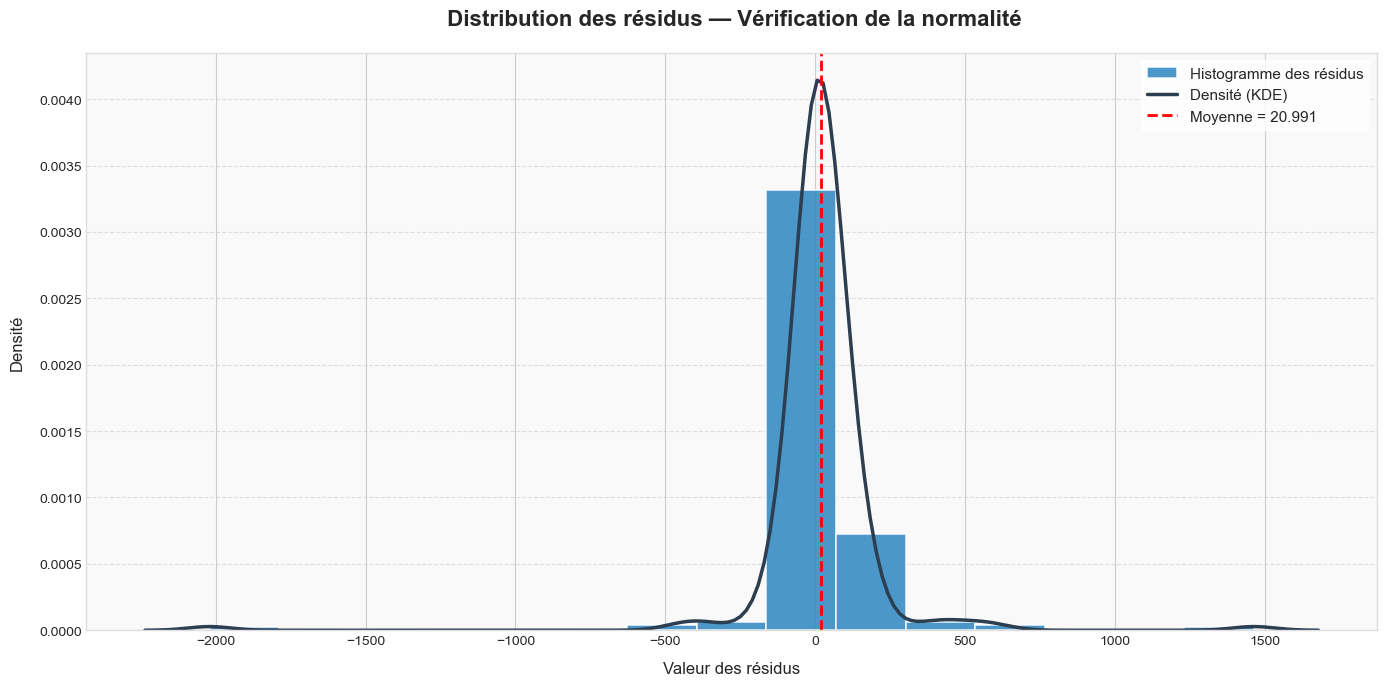

In [63]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

plt.figure(figsize=(14, 7))

n, bins, patches = plt.hist(residus.dropna(), 
                            bins=15, 
                            color='#2E86C1', 
                            edgecolor='white', 
                            linewidth=1.2, 
                            alpha=0.85, 
                            density=True, 
                            label='Histogramme des r√©sidus')

sns.kdeplot(residus.dropna(), color='#2C3E50', linewidth=2.5, label='Densit√© (KDE)')

mean_resid = residus.mean()
plt.axvline(mean_resid, color='red', linestyle='--', linewidth=2, 
            label=f'Moyenne = {mean_resid:.3f}')

plt.title(" Distribution des r√©sidus ‚Äî V√©rification de la normalit√©", 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Valeur des r√©sidus", fontsize=12, labelpad=10)
plt.ylabel("Densit√©", fontsize=12, labelpad=10)

plt.legend(fontsize=11, frameon=True, facecolor='white', edgecolor='white')

plt.grid(True, linestyle='--', alpha=0.6, axis='y')
plt.gca().set_facecolor('#F9F9F9')
for spine in plt.gca().spines.values():
    spine.set_color('#DDDDDD')

plt.tight_layout()
plt.show()

**H0 : la s√©rie suit une loi normale**

**H1 : la s√©rie ne suit pas une loi normale**

In [70]:
if len(residus.dropna()) < 5000:
    stat, p_value = shapiro(residus.dropna())
    print(f"\n Test de Shapiro-Wilk de normalit√© :")
    print(f"Statistique = {stat:.4f}, p-value = {p_value:.4f}")
    if p_value > 0.05:
        print(" Les r√©sidus suivent probablement une loi normale (non-rejet de H‚ÇÄ)")
    else:
        print(" Les r√©sidus ne suivent probablement pas une loi normale (rejet de H‚ÇÄ)")


 Test de Shapiro-Wilk de normalit√© :
Statistique = 0.4574, p-value = 0.0000
 Les r√©sidus ne suivent probablement pas une loi normale (rejet de H‚ÇÄ)


### **- La moyenne des erreurs de pr√©diction**

In [65]:
round(residus.mean(),2)

20.99

# **V- PREVISION**

### **- Pr√©vision et visualisation sans intervalle de confiance**

In [66]:
model = ExponentialSmoothing(
    a,
    trend='add',
    seasonal=None,
    initialization_method='estimated'
)

fitted_model = model.fit()

prev = fitted_model.forecast(steps=4)

print("üìà Pr√©visions (sans intervalle de confiance) :")
print(prev)

üìà Pr√©visions (sans intervalle de confiance) :
2024-06-30    28641.176139
2024-09-30    29006.141276
2024-12-31    29371.106412
2025-03-31    29736.071549
Freq: QE-DEC, dtype: float64


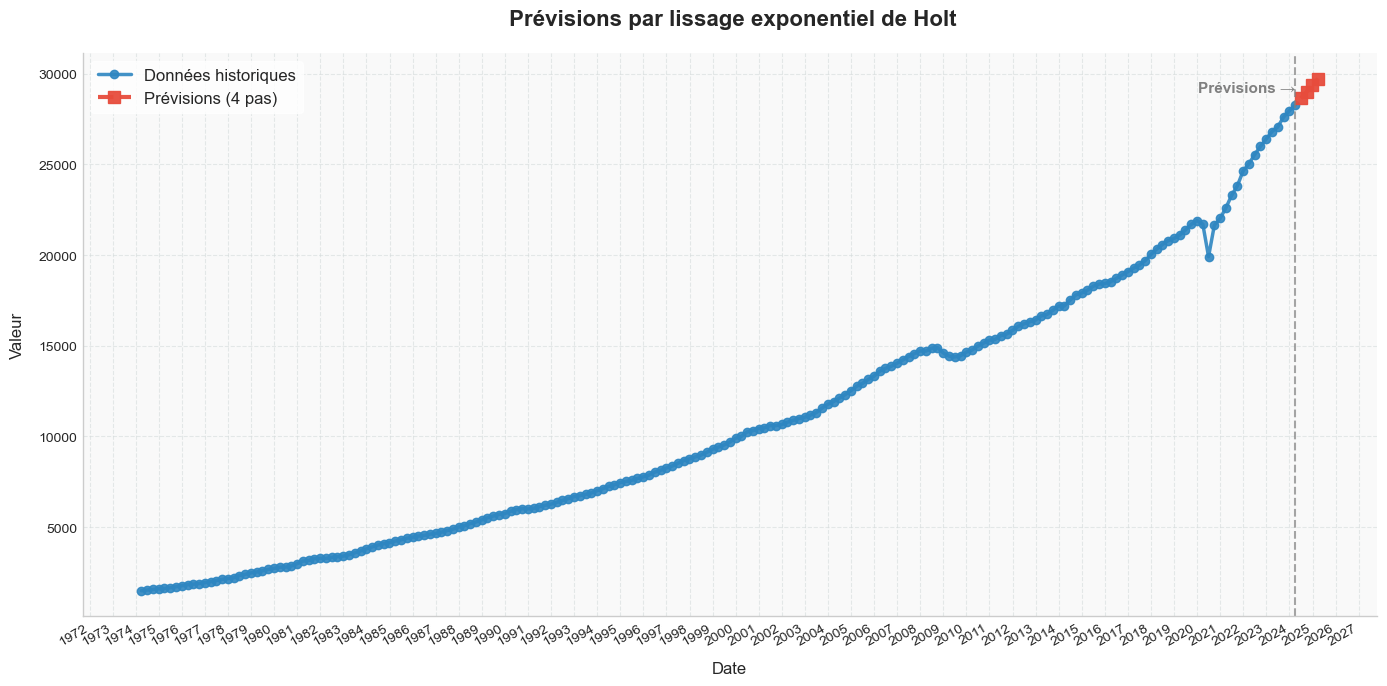

In [67]:
historique = a
prev_series = prev 

plt.figure(figsize=(14, 7))

plt.plot(historique.index, historique,
         color='#2E86C1', linewidth=2.5, marker='o', markersize=6,
         label='Donn√©es historiques', alpha=0.9)

plt.plot(prev_series.index, prev_series,
         color='#E74C3C', linewidth=3.0, marker='s', markersize=8,
         label='Pr√©visions (4 pas)', linestyle='--', alpha=0.95)

plt.axvline(x=historique.index[-1], color='gray', linestyle='--', linewidth=1.5, alpha=0.7)
plt.text(historique.index[-1], plt.ylim()[1]*0.95, 'Pr√©visions ‚Üí',
         ha='right', va='top', fontsize=11, color='gray', fontweight='bold')

plt.title(" Pr√©visions par lissage exponentiel de Holt", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Date", fontsize=12, labelpad=10)
plt.ylabel("Valeur", fontsize=12, labelpad=10)

plt.grid(True, linestyle='--', alpha=0.6, color='#D5DBDB')
plt.gca().set_facecolor('#F9F9F9')

plt.legend(loc='upper left', frameon=True, facecolor='white', edgecolor='white', fontsize=12)

if isinstance(a.index, pd.DatetimeIndex):
    import matplotlib.dates as mdates
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gcf().autofmt_xdate()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### **- Pr√©vision et visualisation avec intervalle de confiance**

In [68]:
model = ExponentialSmoothing(
    a,
    trend='add',
    seasonal=None,
    initialization_method='estimated'
)
fitted_model = model.fit()

steps = 4

forecast = fitted_model.forecast(steps)

residuals = fitted_model.resid
sigma = np.sqrt(np.mean(residuals**2))

h = np.arange(1, steps + 1)
se_forecast = sigma * np.sqrt(h)

z = norm.ppf(0.975)
lower = forecast - z * se_forecast
upper = forecast + z * se_forecast

if isinstance(a.index, pd.DatetimeIndex):
    freq = a.index.freq or pd.infer_freq(a.index)
    if freq is None:
        freq = 'Q' 

    last_date = a.index[-1]
    future_dates = pd.date_range(start=last_date, periods=steps + 1, freq=freq)[1:] 
    forecast.index = future_dates
    lower.index = future_dates
    upper.index = future_dates

print("üìà Pr√©visions avec intervalle de confiance :")
for date, f, l, u in zip(forecast.index, forecast, lower, upper):
    print(f"{date.strftime('%Y-%m-%d')}: {f:.2f}  (95% CI: {l:.2f} ‚Äì {u:.2f})")

üìà Pr√©visions avec intervalle de confiance :
2024-06-30: 28641.18  (95% CI: 28233.98 ‚Äì 29048.37)
2024-09-30: 29006.14  (95% CI: 28430.28 ‚Äì 29582.01)
2024-12-31: 29371.11  (95% CI: 28665.82 ‚Äì 30076.40)
2025-03-31: 29736.07  (95% CI: 28921.67 ‚Äì 30550.47)


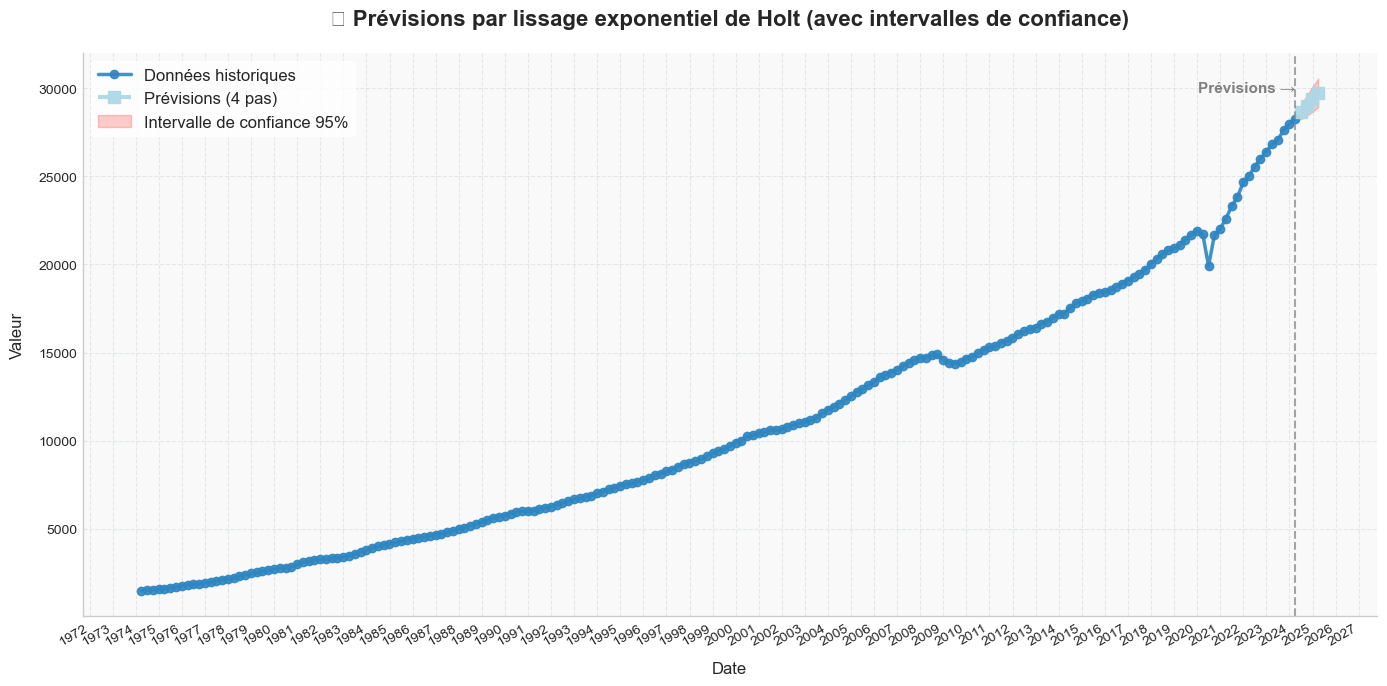

In [69]:
historique = a
prev_series = prev
lower_series = lower
upper_series = upper

plt.figure(figsize=(14, 7))

plt.plot(historique.index, historique,
         color='#2E86C1', linewidth=2.5, marker='o', markersize=6,
         label='Donn√©es historiques', alpha=0.9)

plt.plot(prev_series.index, prev_series,
         color='lightblue', linewidth=3.0, marker='s', markersize=8,
         label='Pr√©visions (4 pas)', linestyle='--', alpha=0.95)

plt.fill_between(prev_series.index,
                 lower_series,
                 upper_series,
                 color='red', alpha=0.2, label='Intervalle de confiance 95%')

plt.axvline(x=historique.index[-1], color='gray', linestyle='--', linewidth=1.5, alpha=0.7)
plt.text(historique.index[-1], plt.ylim()[1]*0.95, 'Pr√©visions ‚Üí',
         ha='right', va='top', fontsize=11, color='gray', fontweight='bold')

plt.title("üìà Pr√©visions par lissage exponentiel de Holt (avec intervalles de confiance)", 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Date", fontsize=12, labelpad=10)
plt.ylabel("Valeur", fontsize=12, labelpad=10)

plt.grid(True, linestyle='--', alpha=0.6, color='#D5DBDB')
plt.gca().set_facecolor('#F9F9F9')

plt.legend(loc='upper left', frameon=True, facecolor='white', edgecolor='white', fontsize=12)

if isinstance(a.index, pd.DatetimeIndex):
    import matplotlib.dates as mdates
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gcf().autofmt_xdate()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### **CONCLUSION**
Au regard du graphique des r√©sidus, il semble plausible que les erreurs de pr√©vision aient une variance constante 
dans le temps. 
Le test de bruit blanc est convaincant
√Ä partir de l'histogramme des erreurs de pr√©vision, il semble plausible que les erreurs de pr√©vision soient 
normalement r√©parties de moyenne z√©ro. Mais le test de normalit√© nous indique que la s√©rie ne suit pas une loi 
normale
Les erreurs ne sont pas centr√©es (moyenne nulle) 
Le mod√®le est certes acceptable car les r√©sidus sont un bruit blanc mais peut 
√™tre am√©lior√© car ce n‚Äôest pas un blanc gaussien et centr√©.

# **CONCLUSION GENERALE**
**Dans cette √©tude, nous avons cherch√© √† savoir si le PIB suffit vraiment √† mesurer la sant√© d‚Äôun pays. Nos r√©sultats montrent que la m√©thode du lissage exponentiel capture bien l‚Äô√©volution du PIB am√©ricain, avec une marge d‚Äôerreur raisonnable et des r√©sidus qui ressemblent √† du bruit blanc. M√™me si ces r√©sidus ne suivent pas une distribution parfaitement normale, le mod√®le reste fiable pour faire des pr√©visions. Par exemple, voici les estimations du PIB am√©ricain pour les prochains trimestres, avec un niveau de confiance de 95% : environ 28 641 pour fin juin 2024, 29 006 pour fin septembre 2024, 29 371 pour fin d√©cembre 2024, et 29 736 pour fin mars 2025.**

**Depuis plusieurs ann√©es, le PIB des √âtats-Unis a connu une belle croissance gr√¢ce √† des r√©formes √©conomiques profondes. Malgr√© des obstacles internes et externes, le pays a r√©ussi √† relancer son √©conomie par des politiques solides qui ont favoris√© diff√©rents secteurs. Cela confirme que la croissance du PIB reste un bon indicateur pour √©valuer la sant√© √©conomique globale d‚Äôun pays.**

**Cependant, pour vraiment comprendre ce que signifie cette croissance, il serait int√©ressant d‚Äôaller plus loin en int√©grant des donn√©es sociales, comme le niveau de vie ou la r√©partition des salaires. Cela permettrait de voir si cette augmentation du PIB se traduit par un meilleur bien-√™tre pour tous et une r√©partition √©quitable des richesses. Une telle approche pourrait nous aider √† mieux mesurer la performance r√©elle d‚Äôune √©conomie, au-del√† des simples chiffres.**

###### Did by : Onesime-ndri